<a href="https://www.kaggle.com/code/xcufx0qc2os1/diabetes-eda-classification-with-81-accuracy?scriptVersionId=108907464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes.csv


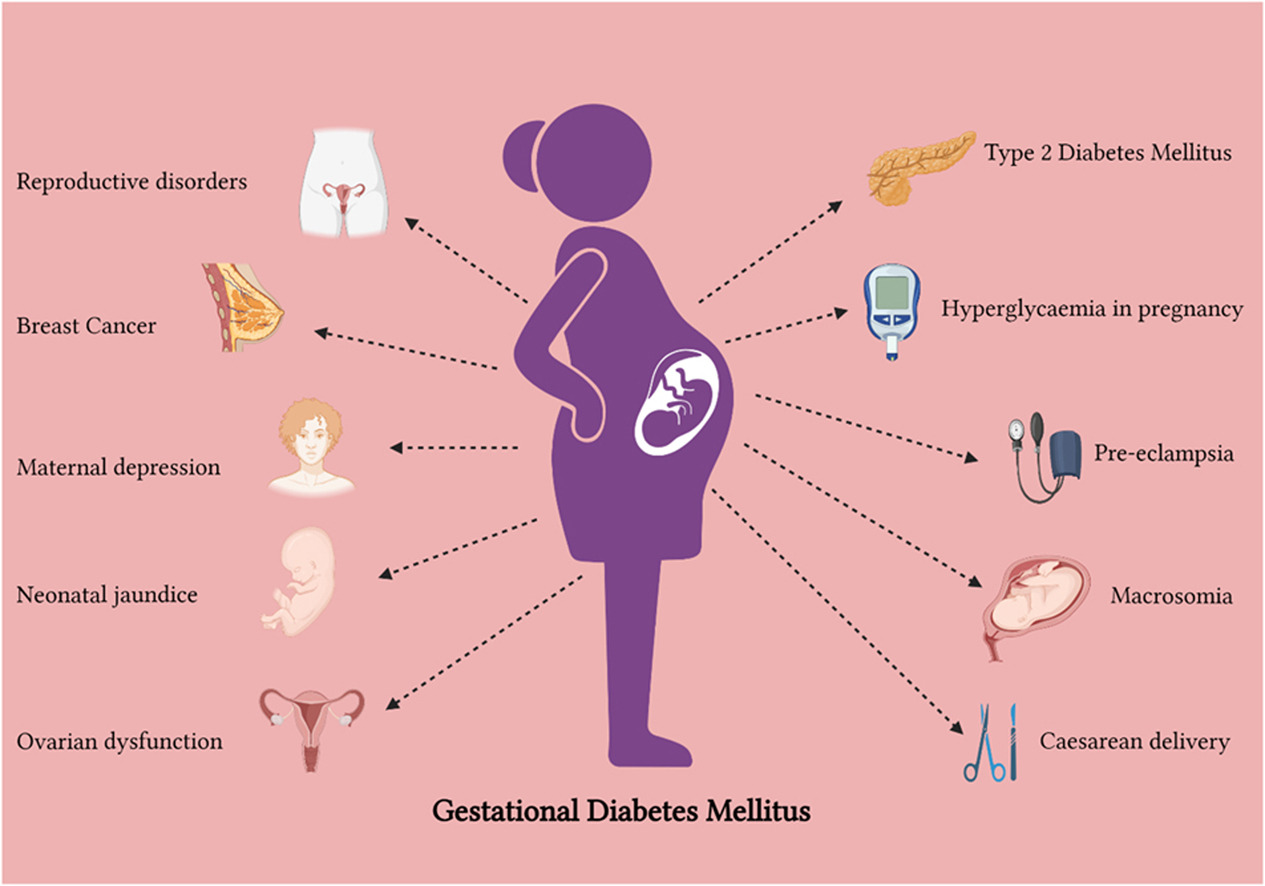

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:lightgreen;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> 
🙏    <span style="color:green;font-size:18px;"> WELCOME </span>
    
  💉💊🩺  <span style="color:brown;font-size:16px;"> Diabetes is a long-term (chronic) illness that affects how your body converts food into energy. The majority of the food you consume is converted by your body into sugar (glucose), which is then released into your bloodstream.Gestational Diabetes presents during pregancy and posses many challenges</span>

<span style="color:brown;font-size:16px;">Managing diabetes is more difficult for women. Keeping on track by regularly checking your blood sugar, eating well, and exercising so that women can feel and be as healthy as possible. How does diabetes affect women differently than it does men? Women have worse outcomes following a heart attack than men, and diabetes increases the risk of heart disease (the most common diabetes complication) by about four times in women but only by about two times in men. Other diabetes-related complications like blindness, kidney disease, and depression are also more common in women. Women of African American, Hispanic/Latino, American Indian/Alaska Native, and Asian/Pacific Islander descent are more likely to have diabetes than white women. Diabetes is not only different for women, it is also different among women.</span>

<span style="color:brown;font-size:16px;"> This dataset contains different parameters of women who were diagnosed positive or negative for Diabetes 
</p>
</div>


# Import Libraries

In [104]:
!pip install klib

In [105]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import klib
%matplotlib inline

# Import Data

In [106]:
df = pd.read_csv("../input/diabetes-dataset/diabetes.csv")

# EDA

In [107]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [109]:
df.shape

(768, 9)

In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


<AxesSubplot:>

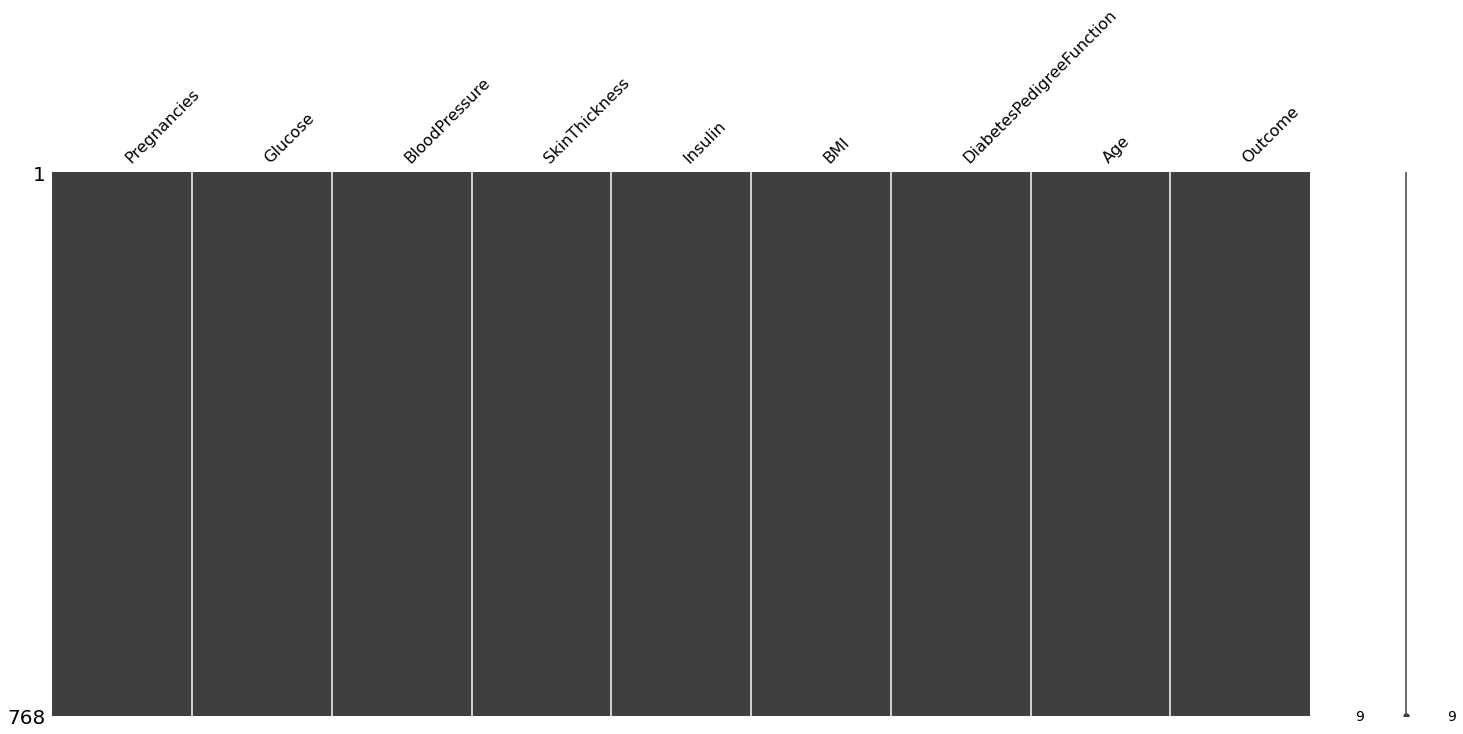

In [111]:
#testing for missing number
msno.matrix(df)

# Distribution of Diabetes among all other variables
## Bivariate analysis

In [112]:
#cleaning column names for effeciency
df = klib.clean_column_names(df)

Long column names detected (>25 characters). Consider renaming the following columns ['diabetes_pedigree_function'].


In [113]:
df.columns

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

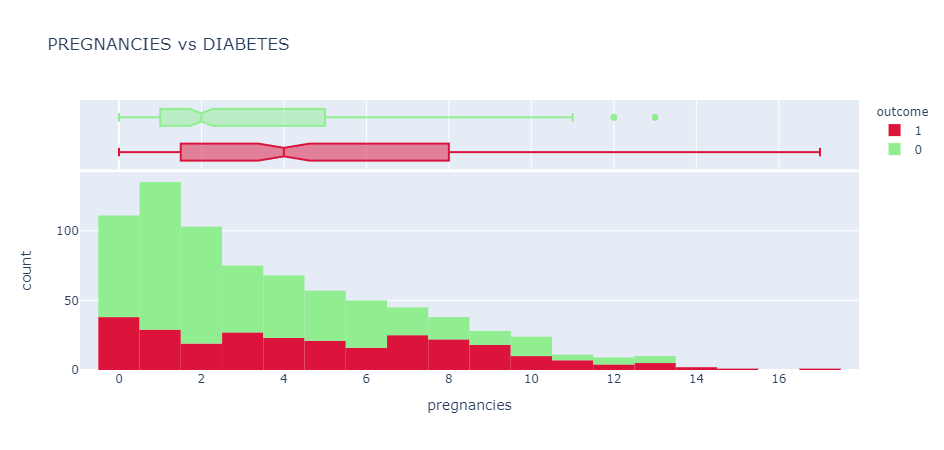

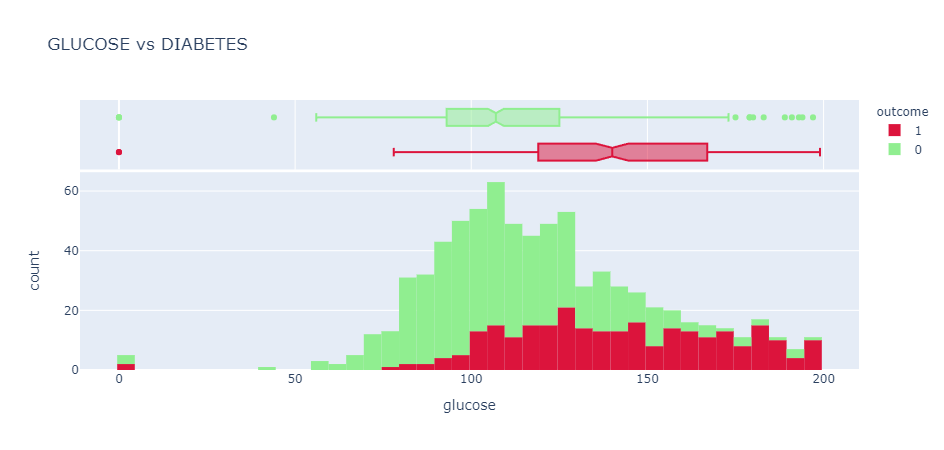

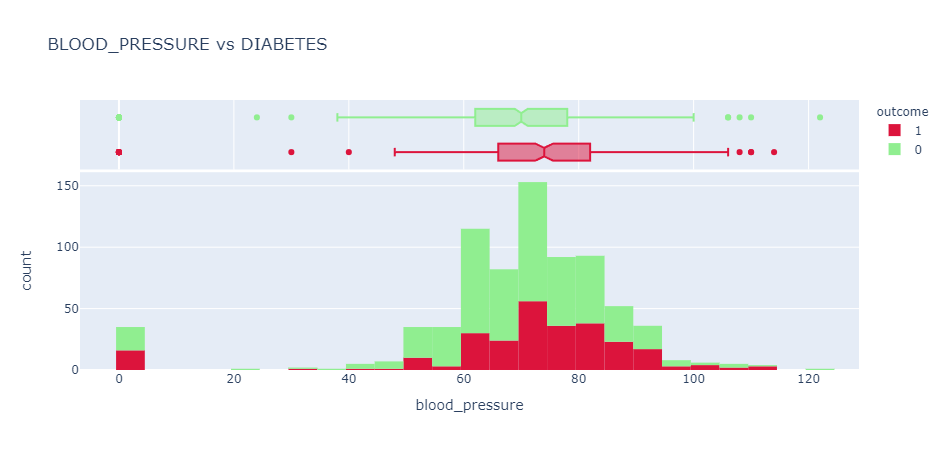

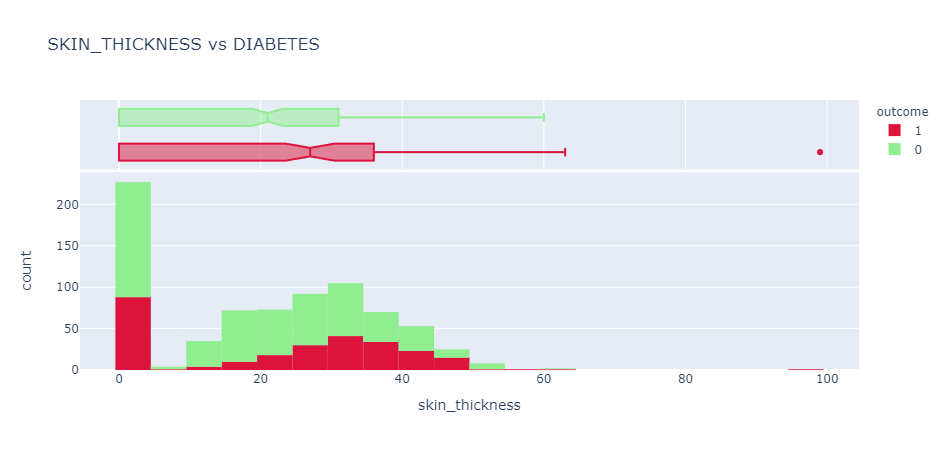

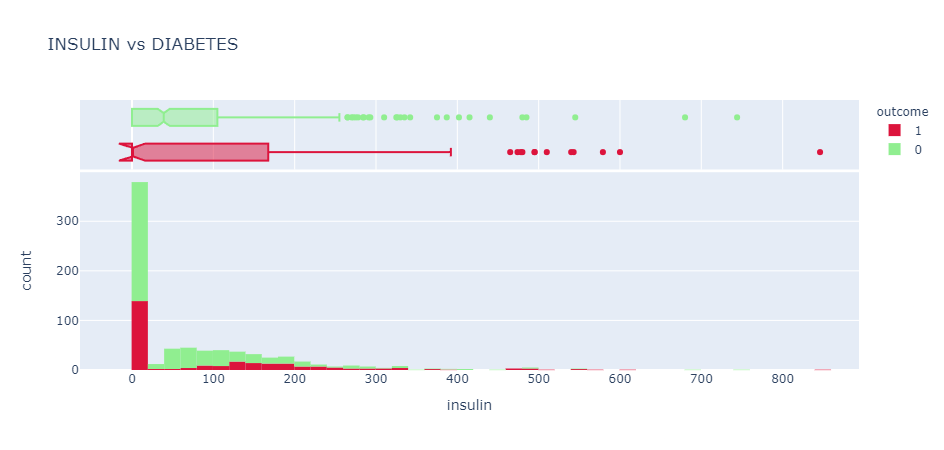

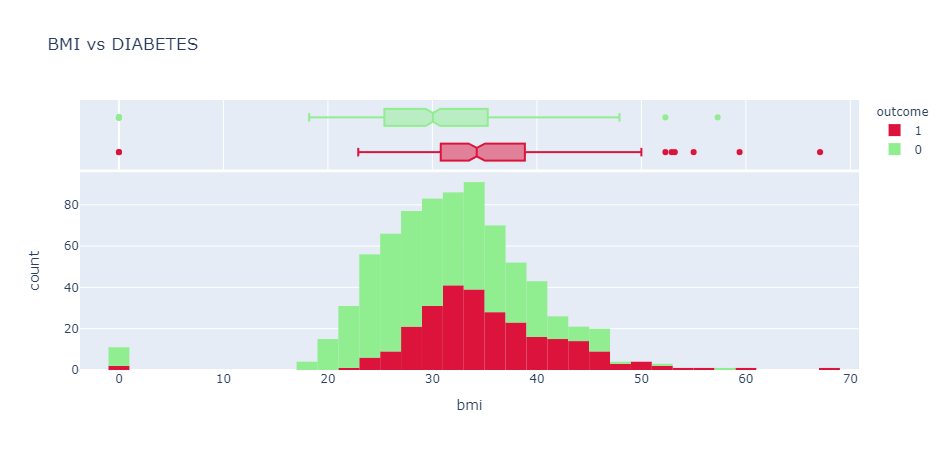

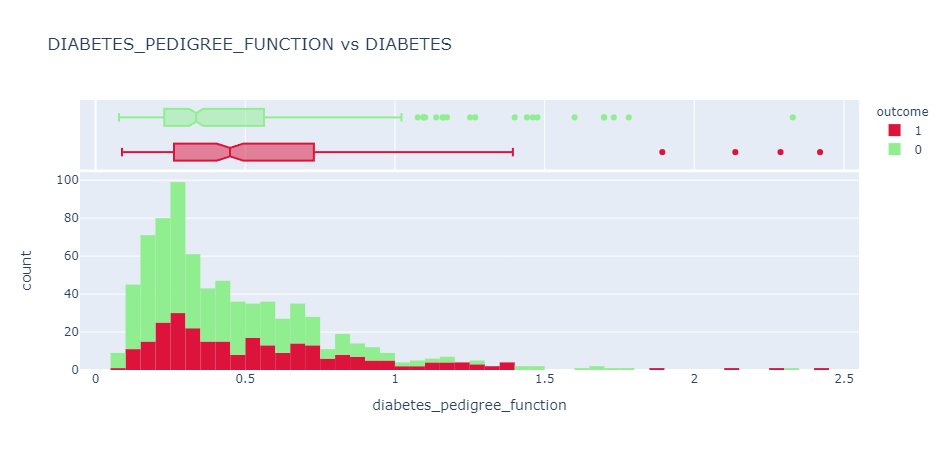

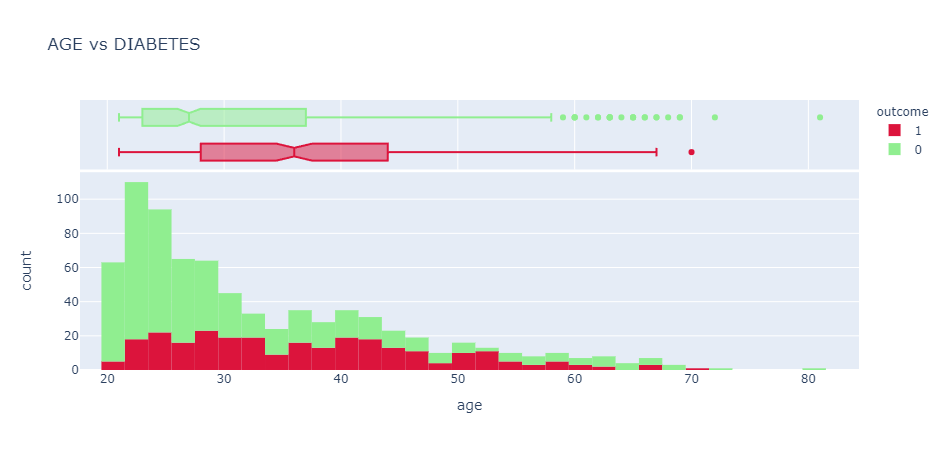

In [114]:
col = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
for col in col:
    fig = px.histogram(df, x = col ,color = 'outcome', marginal='box' , title = col.upper() + ' vs DIABETES' , color_discrete_map={1:'crimson',0:'lightgreen'})
    fig.show()

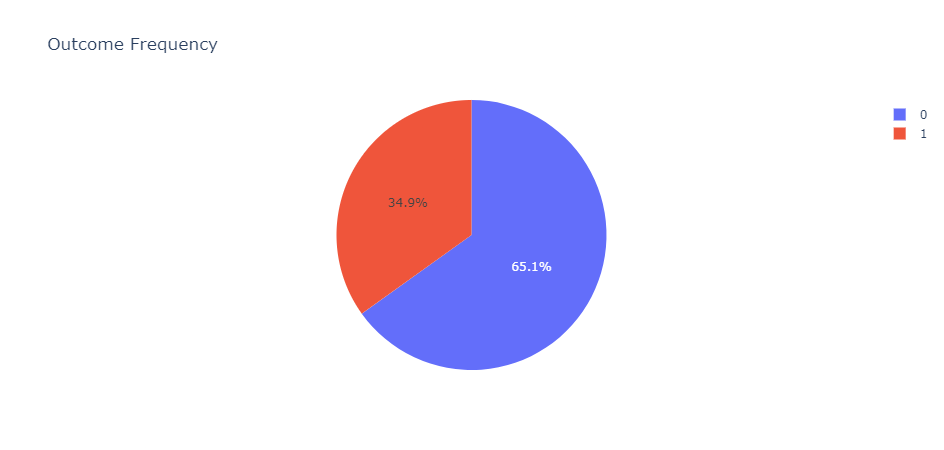

In [115]:
# target distribution
px.pie(df, names = 'outcome' , title = "Outcome Frequency")

### Observation : 
    1. All variables except insulin seem to have some degree of normal distribution
    2. All variables have outliers
    3. There are no missing values

# Correlation within data and target based

<AxesSubplot:>

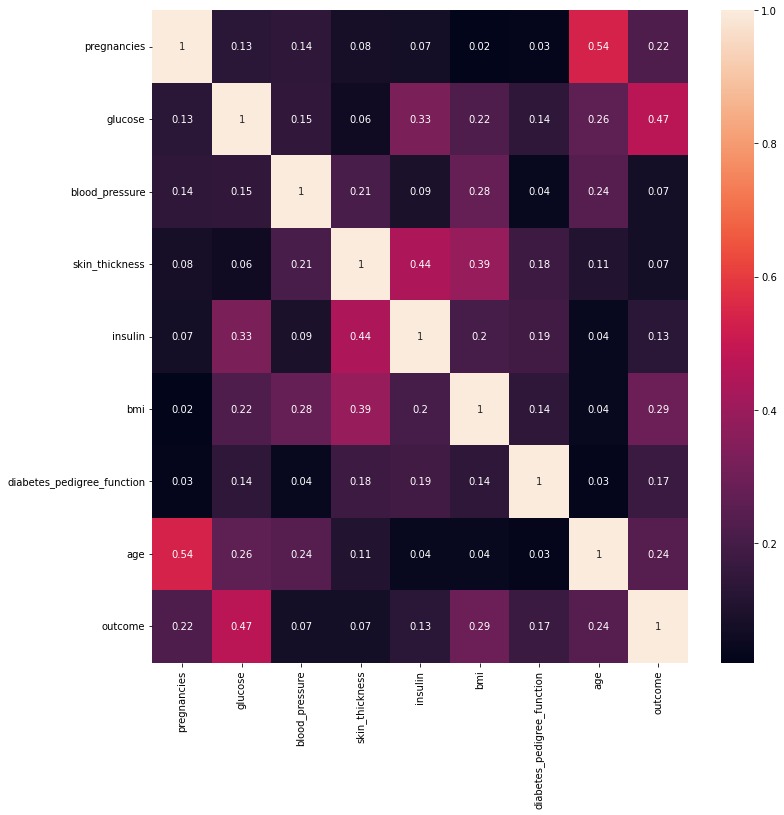

In [116]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr().abs().round(2),annot=True)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

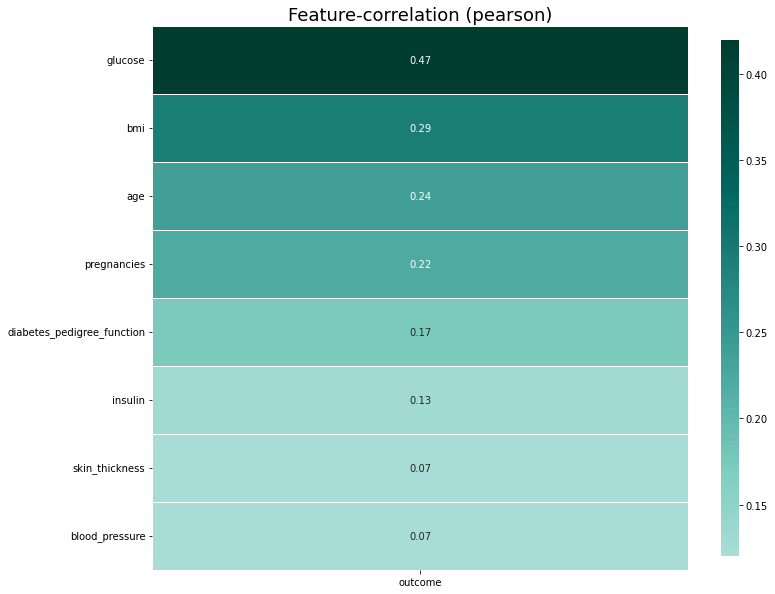

In [117]:
# target feature correlation
klib.corr_plot(df, target='outcome')

### Observation:
    1. Correlation within data (multicollinearity) is not more than 54% which is between age and pregnancy therefore multicollinearity can be ruled out
    2. Glucose , bmi, age, pregnanices have higher correlation with target but it is weak as their values are <50%

# Logistic Regression with LazyPredict 

In [118]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [119]:
import lazypredict

In [120]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 15.73it/s]


In [121]:
#Accuracy leader board
models.sort_values('Accuracy',ascending =False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,0.81,0.77,0.77,0.80,0.03
RidgeClassifier,0.81,0.77,0.77,0.80,0.02
DecisionTreeClassifier,0.80,0.80,0.80,0.80,0.02
RidgeClassifierCV,0.80,0.76,0.76,0.79,0.02
CalibratedClassifierCV,0.80,0.76,0.76,0.79,0.16
LinearSVC,0.80,0.76,0.76,0.79,0.07
LogisticRegression,0.80,0.76,0.76,0.79,0.02
QuadraticDiscriminantAnalysis,0.79,0.76,0.76,0.79,0.01
XGBClassifier,0.79,0.77,0.77,0.79,0.48


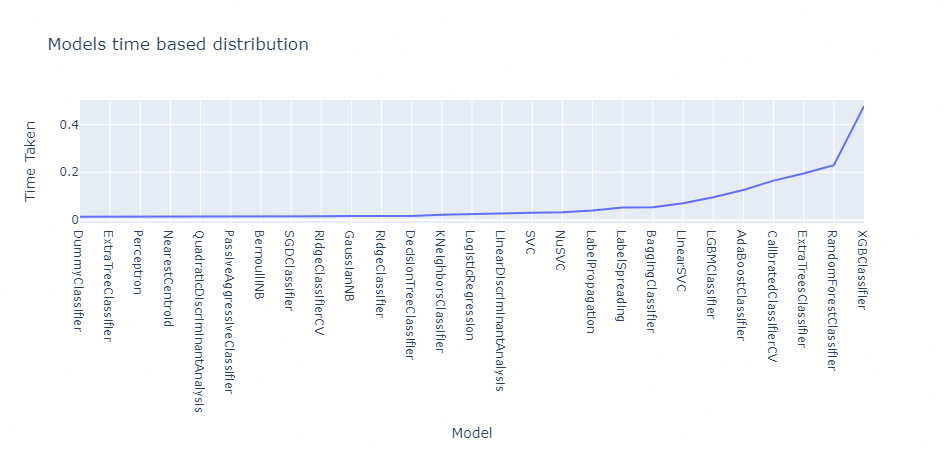

In [122]:
#plotting models based on time taken
time = models.sort_values(by='Time Taken')
px.line(time, y= 'Time Taken', hover_data= ['Accuracy', "Balanced Accuracy", 'ROC AUC', 'F1 Score'] ,title = 'Models time based distribution')



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;"> 
📌📌<span style="color:blue;font-size:16px;"> Final Observation</span>

<span style="color:blue;font-size:16px;">1. LinearDiscriminantAnalysis showed an accuracy of 81% (balanced accuracy = 0.77 , ROC AUC = 0.77, F1 Score = 0.80 and Time taken = 0.02) which was the best model overall based on accuracy of prediction</span>

<span style="color:blue;font-size:16px;"> 2. DecisionTreeClassifier showed accuracy of 80% (balanced accuracy = 0.80 , ROC AUC = 0.80, F1 Score = 0.80 and Time taken = 0.02) which turns out to be a best balanced overall model</span>
</p>
</div>

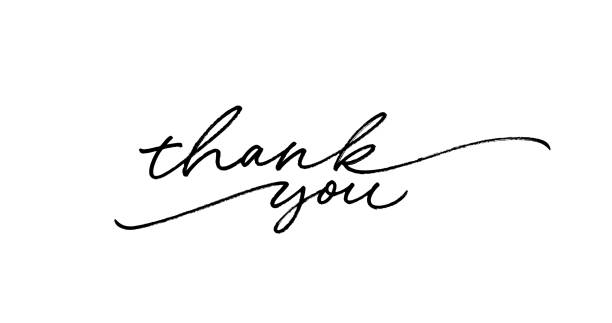